# Gesture Classification

This notebook is used to train classification models from csv dataset. 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [19]:
# set up
dataset_train = 'datasets/HandLandmarks_train750.csv'
dataset_test = 'datasets/HandLandmarks_test150.csv'
dataset = 'datasets/HandLandmarks125_shift.csv'

model_save_path = 'models/keypoint_classifier.hdf5'
tflite_save_path = 'models/keypoint_classifier_part1.tflite'
tflite_save_path2 = 'models/keypoint_classifier_part2.tflite'

LABELS = ['call', 'dislike', 'fist', 'like', 'mute', 'ok', 'one', 'palm', 'peace', 'rock', 'stop', 'stop_inverted'] 
NUM_CLASSES = len(LABELS)

## Dataset Preparation

In [20]:
# # Load the datasets
# train_df = pd.read_csv(dataset_train, header=None, dtype='float32')
# test_df = pd.read_csv(dataset_test, header=None, dtype='float32')

# y_train = train_df.iloc[:, 0].values.astype('int32')
# X_train = train_df.iloc[:, 1:].values
# y_test = test_df.iloc[:, 0].values.astype('int32')
# X_test = test_df.iloc[:, 1:].values

In [21]:
# Load the datasets and apply train_test_split
df = pd.read_csv(dataset, header=None, dtype='float32')

y_dataset = df.iloc[:, 0].values.astype('int32')
X_dataset = df.iloc[:, 1:].values

X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [22]:
y_train

array([ 6,  9, 11, ...,  6, 11,  9])

In [23]:
X_train[0].shape

(64,)

In [24]:
# print(train_df.shape, test_df.shape)
# print(y_train.shape, X_train.shape, y_test.shape, X_test.shape)
# y_test

## Model Building

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 3 + 1, )),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),  # Increased units
    tf.keras.layers.BatchNormalization(),  # Added Batch Normalization
    tf.keras.layers.Dropout(0.1),  # Adjusted dropout rate
    tf.keras.layers.Dense(128, activation='relu'),  # Increased units
    tf.keras.layers.BatchNormalization(),  # Added Batch Normalization
    tf.keras.layers.Dense(64, activation='relu'),  # Increased units
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                     

In [27]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=30, verbose=1)

In [28]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Model Training

In [29]:
es_callback

In [30]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


1/9 [==>...........................] - ETA: 15s - loss: 2.9143 - accuracy: 0.0781
Epoch 1: saving model to models\keypoint_classifier.hdf5
9/9 [==============================] - 2s 43ms/step - loss: 2.7339 - accuracy: 0.1173 - val_loss: 2.4767 - val_accuracy: 0.1200
Epoch 2/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.5120 - accuracy: 0.1641
Epoch 2: saving model to models\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 2.5055 - accuracy: 0.1431 - val_loss: 2.4706 - val_accuracy: 0.1387
Epoch 3/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.4899 - accuracy: 0.1953
Epoch 3: saving model to models\keypoint_classifier.hdf5


c:\Users\Ian\git\553.806_Capstone_HandGesture\.venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 0s 13ms/step - loss: 2.3901 - accuracy: 0.2107 - val_loss: 2.4647 - val_accuracy: 0.1467
Epoch 4/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.3595 - accuracy: 0.2109
Epoch 4: saving model to models\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 2.2696 - accuracy: 0.2373 - val_loss: 2.4583 - val_accuracy: 0.1120
Epoch 5/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.2926 - accuracy: 0.2031
Epoch 5: saving model to models\keypoint_classifier.hdf5
9/9 [==============================] - 0s 12ms/step - loss: 2.2042 - accuracy: 0.2462 - val_loss: 2.4487 - val_accuracy: 0.0960
Epoch 6/1000
1/9 [==>...........................] - ETA: 0s - loss: 2.1760 - accuracy: 0.2344
Epoch 6: saving model to models\keypoint_classifier.hdf5
9/9 [==============================] - 0s 13ms/step - loss: 2.1313 - accuracy: 0.2604 - val_loss: 2.4345 - val_accuracy: 0.0933
Epoch 7/1000
1/9 [==>..............

In [31]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 4ms/step - loss: 0.8631 - accuracy: 0.7013


In [32]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [33]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 127ms/step
[2.7581560e-08 4.6724180e-09 1.6433356e-05 1.5561104e-09 1.6567838e-05
 9.8670935e-06 2.5654701e-03 5.8287799e-02 9.3349195e-01 2.7830672e-04
 5.3308718e-03 2.7331316e-06]
8


# Confusion matrix

12/12 [==============================] - 0s 2ms/step


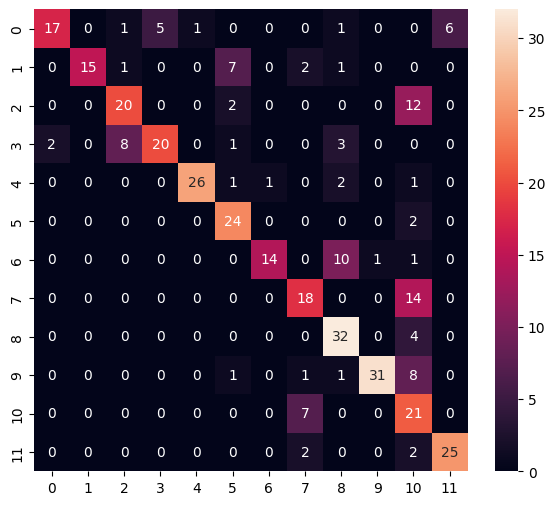

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.55      0.68        31
           1       1.00      0.58      0.73        26
           2       0.67      0.59      0.62        34
           3       0.80      0.59      0.68        34
           4       0.96      0.84      0.90        31
           5       0.67      0.92      0.77        26
           6       0.93      0.54      0.68        26
           7       0.60      0.56      0.58        32
           8       0.64      0.89      0.74        36
           9       0.97      0.74      0.84        42
          10       0.32      0.75      0.45        28
          11       0.81      0.86      0.83        29

    accuracy                           0.70       375
   macro avg       0.77      0.70      0.71       375
weighted avg       0.77      0.70      0.71       375



In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

# y_pred = integrated_prediction(model, secondary_model, X_test)  # Integrated prediction

print_confusion_matrix(y_test, y_pred)